Обучите простую модель предсказания цены акций. Используйте рассмотренные на лекции алгоритмы предсказания рядов (не менее двух, например, модель Хольта-Уинтерса и SARIMA). Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностью как минимум за год.

    Найти данные можно на kaggle или использовать FAANG датасет из 1-й лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модели на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью моделей 
    
    Отобразите на графике предсказание моделей и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
plt.rcParams['figure.figsize'] = (20, 10)

df = pd.read_csv('data/Netflix_Historical_StockPrice2.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,98.339996,101.440002,97.820000,101.209999,101.209999,12432200
1,2016-03-29,101.080002,104.330002,101.000000,104.129997,104.129997,16008900
2,2016-03-30,104.650002,104.910004,101.480003,102.190002,102.190002,14705000
3,2016-03-31,102.430000,103.529999,101.050003,102.230003,102.230003,9747500
4,2016-04-01,102.930000,105.790001,102.470001,105.699997,105.699997,14182400


In [76]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [77]:
df['Date'] = pd.to_datetime(df['Date']) - pd.to_timedelta(7, unit='d')
df = df.groupby([pd.Grouper(key='Date', freq='W')]).mean()

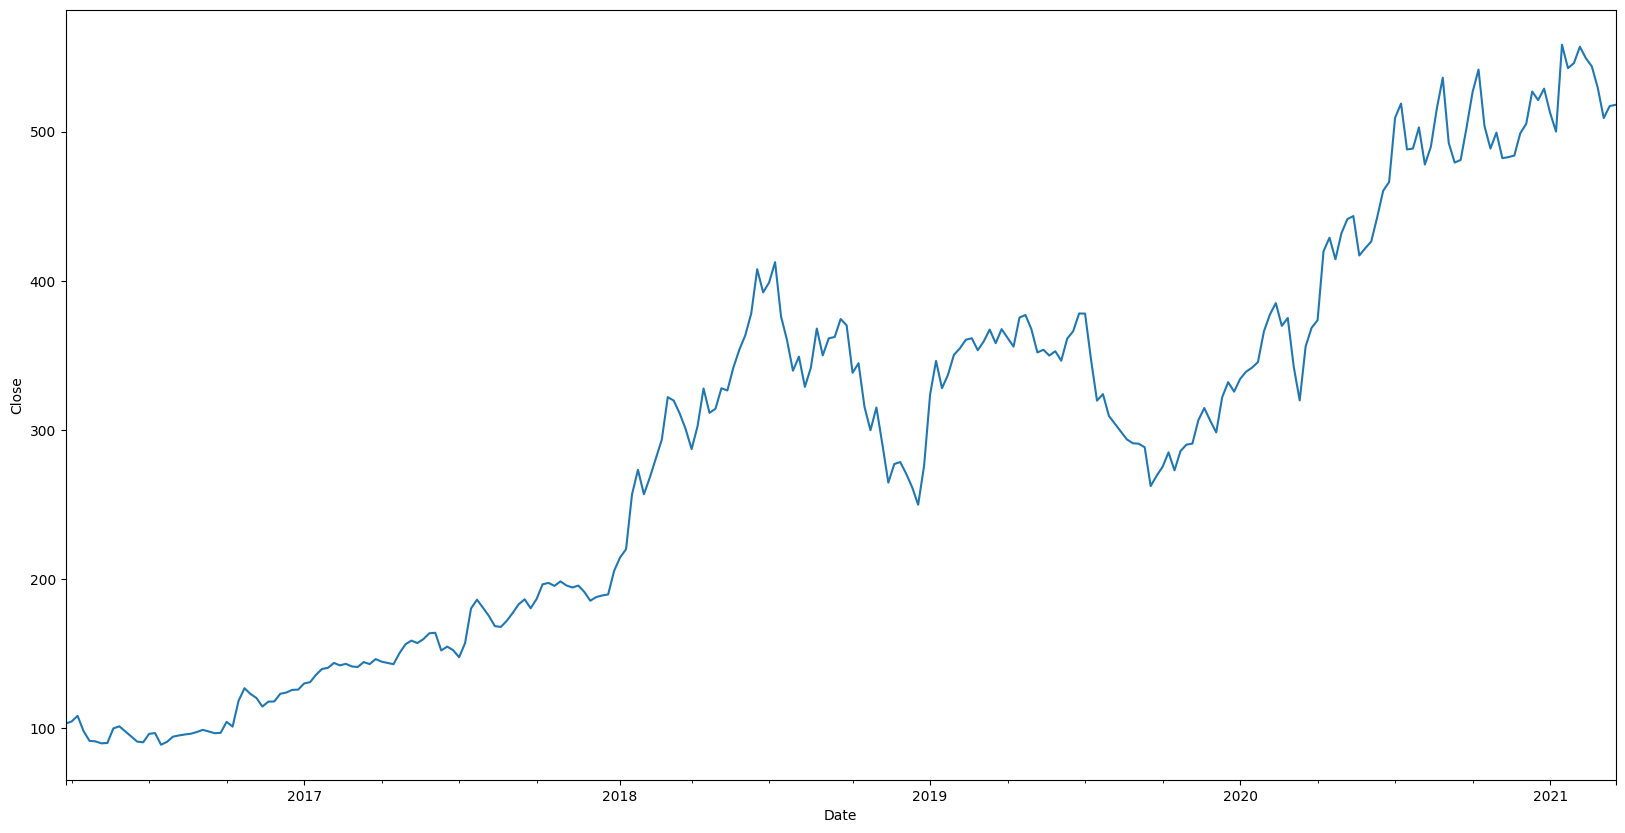

In [78]:
plt.xlabel('Year')
plt.ylabel('Close')
df.Close.plot()
plt.show()

<AxesSubplot:>

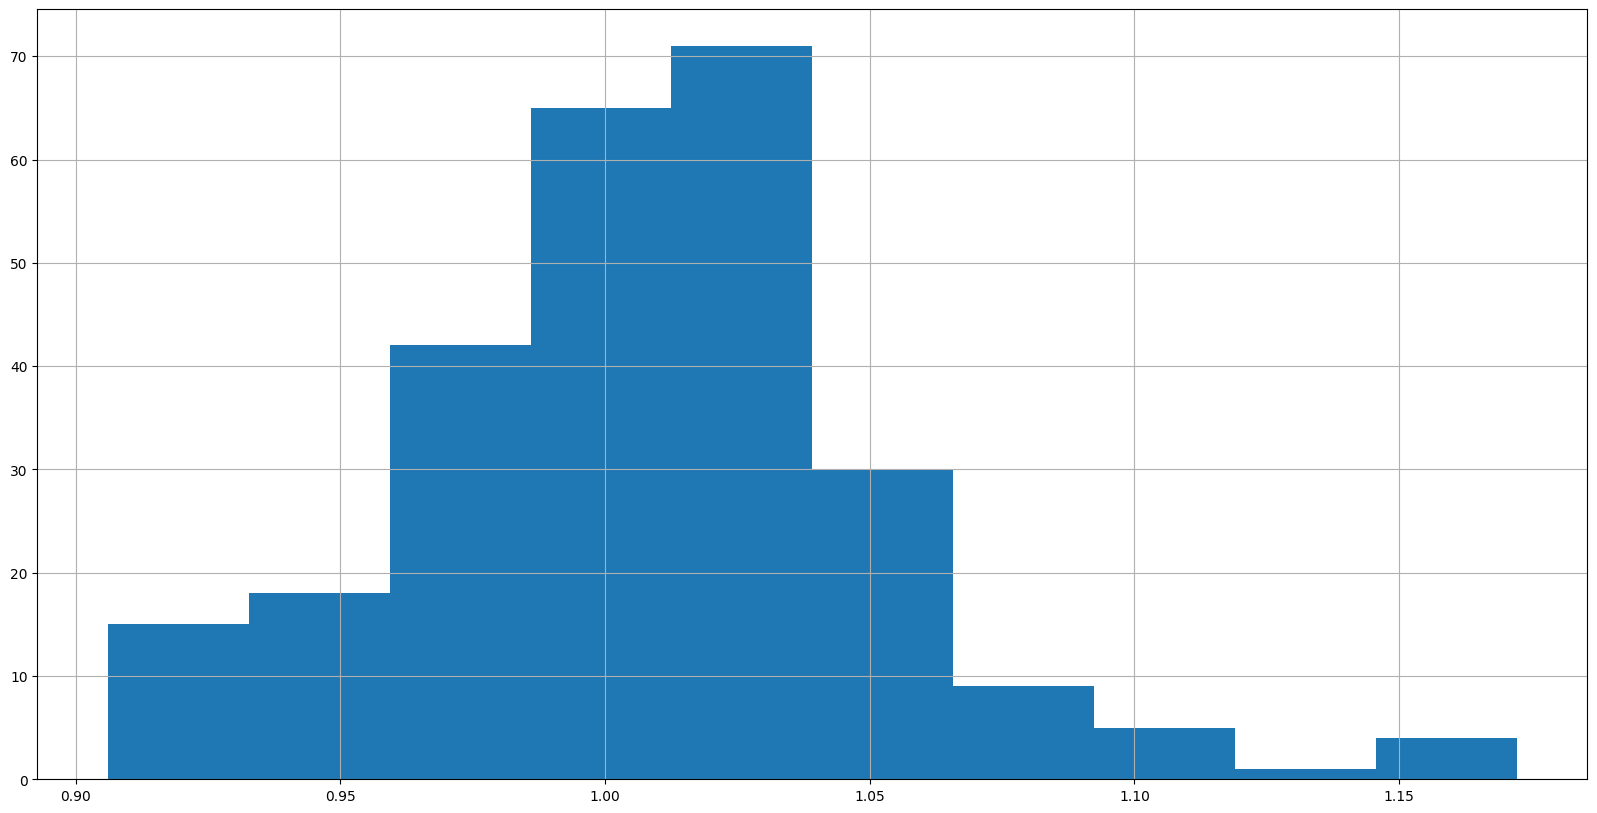

In [79]:
(df['Close'] / df['Close'].shift(1)).hist()

In [80]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

def check_stationarity_series(s, k=0):
    test = sm.tsa.adfuller(df[s][k:])
    print('adf: ', test[0])
    print('p_value: ', test[1])
    print('critical values: ', test[4])
    if test[0] > test[4]['5%']:
        print('есть единичные корни, ряд не стационарен')
    else:
        print('единичных корней нет, ряд стационарен')


def plot_partitions(s, k=1):
    global df
    decompose = seasonal_decompose(df[s][k:])

    fig, ax = plt.subplots(nrows=4, ncols=1)
    ax[0].set_title('Observed')
    ax[1].set_title('Trend')
    ax[2].set_title('Seasonal')
    ax[3].set_title('Residual')

    decompose.observed.plot(ax=ax[0])
    decompose.trend.plot(ax=ax[1])
    decompose.seasonal.plot(ax=ax[2])
    decompose.resid.plot(ax=ax[3])


def cor(s, k=0):
    _, ax = plt.subplots()
    plot_acf(df[s][k:], lags=40, ax=ax)

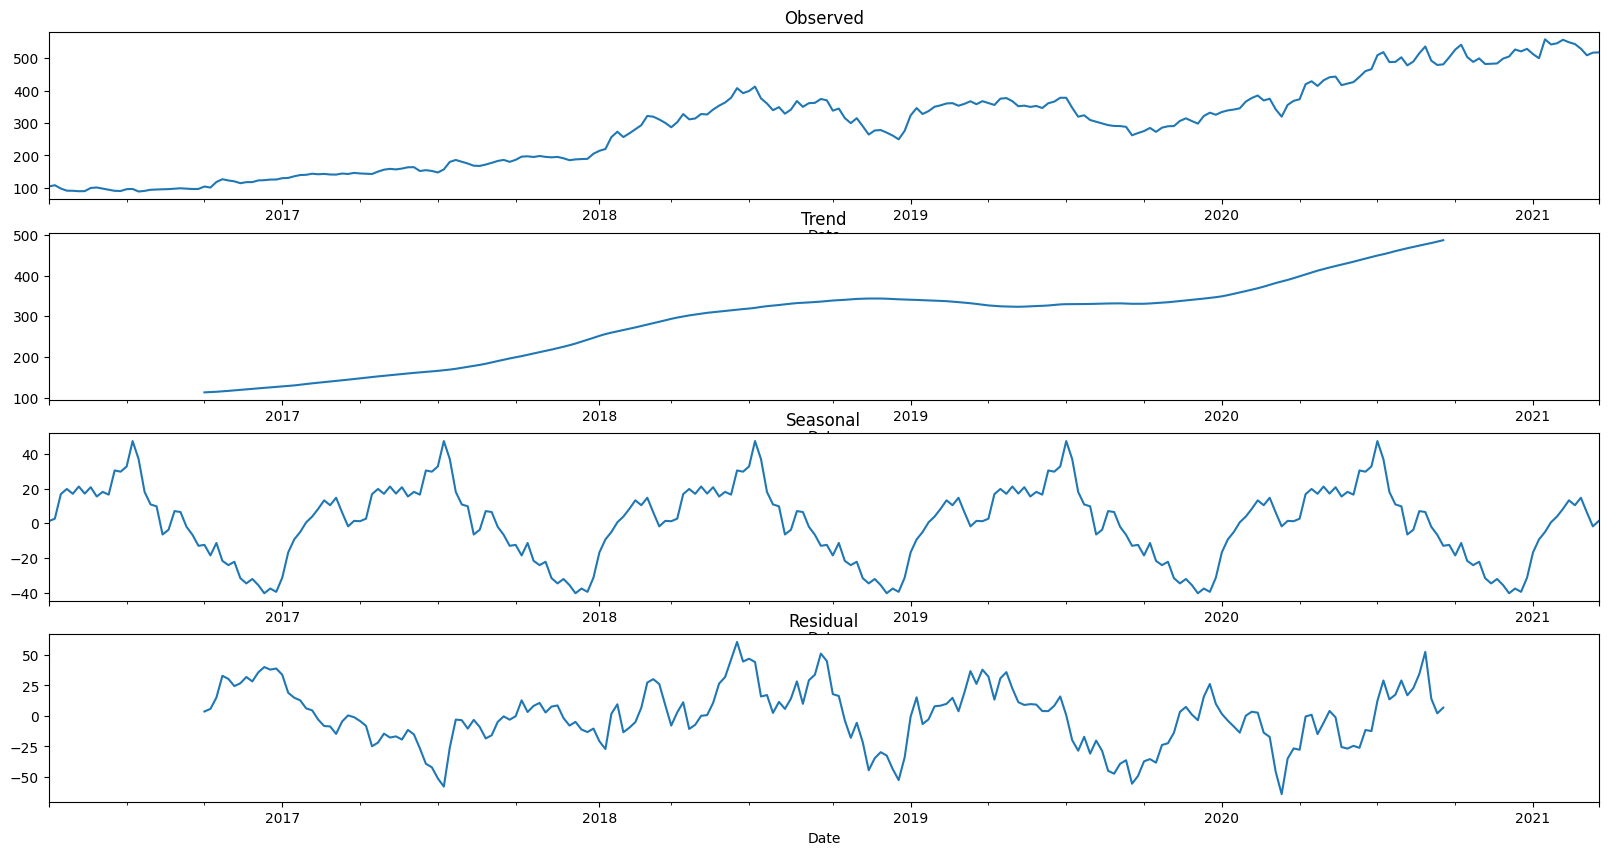

In [81]:
plot_partitions('Close')

In [82]:
check_stationarity_series('Close')

adf:  -0.6172514163546705
p_value:  0.8670360729707224
critical values:  {'1%': -3.4561550092339512, '5%': -2.8728972266578676, '10%': -2.5728222369384763}
есть единичные корни, ряд не стационарен


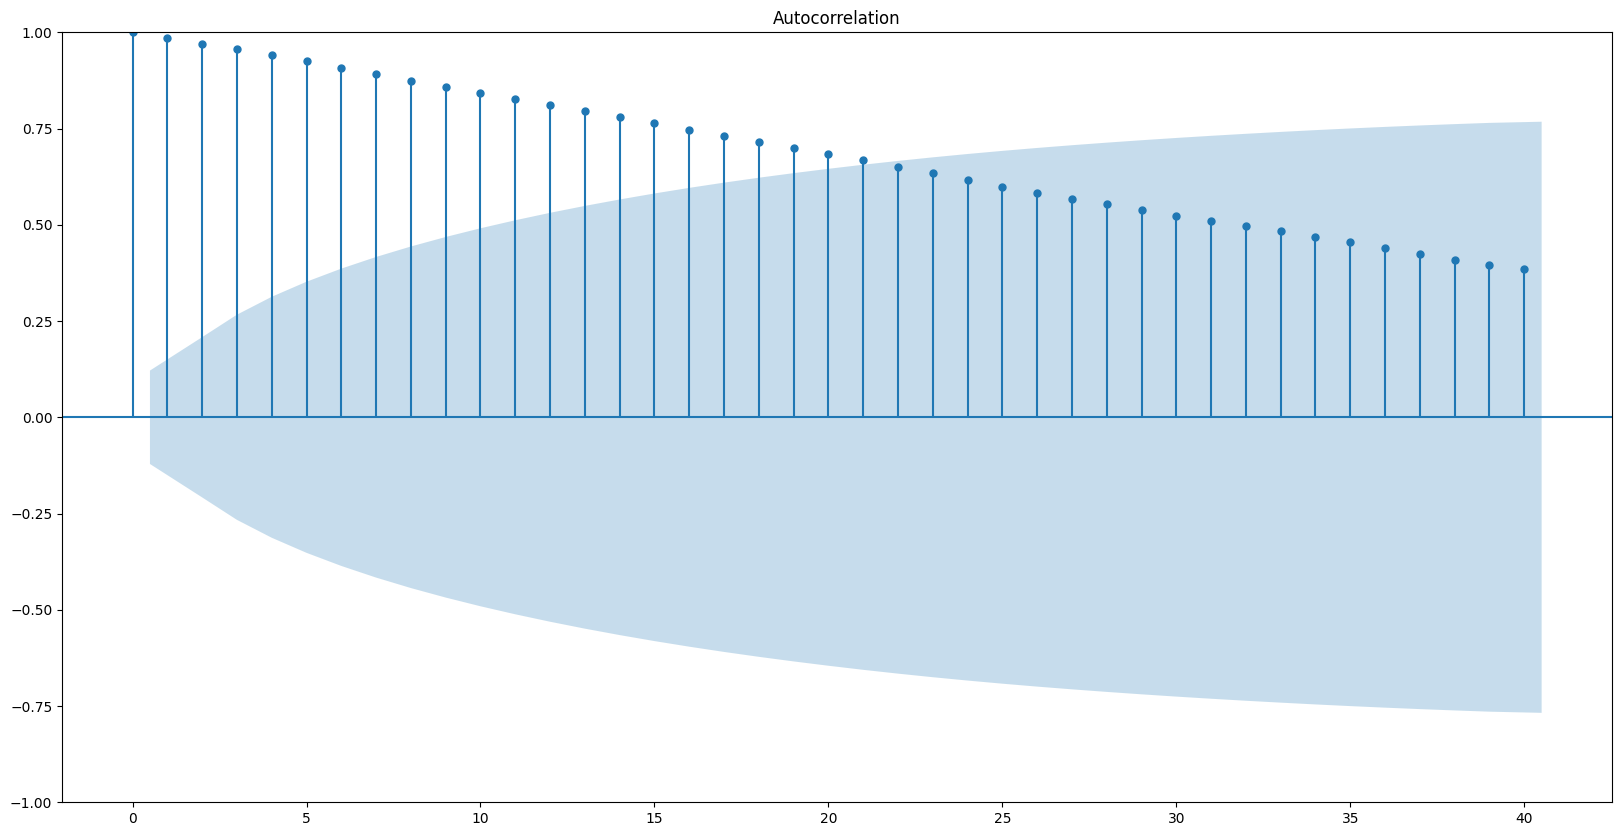

In [83]:
cor('Close')

In [84]:
df['CloseDiff'] = df.High.diff(1)

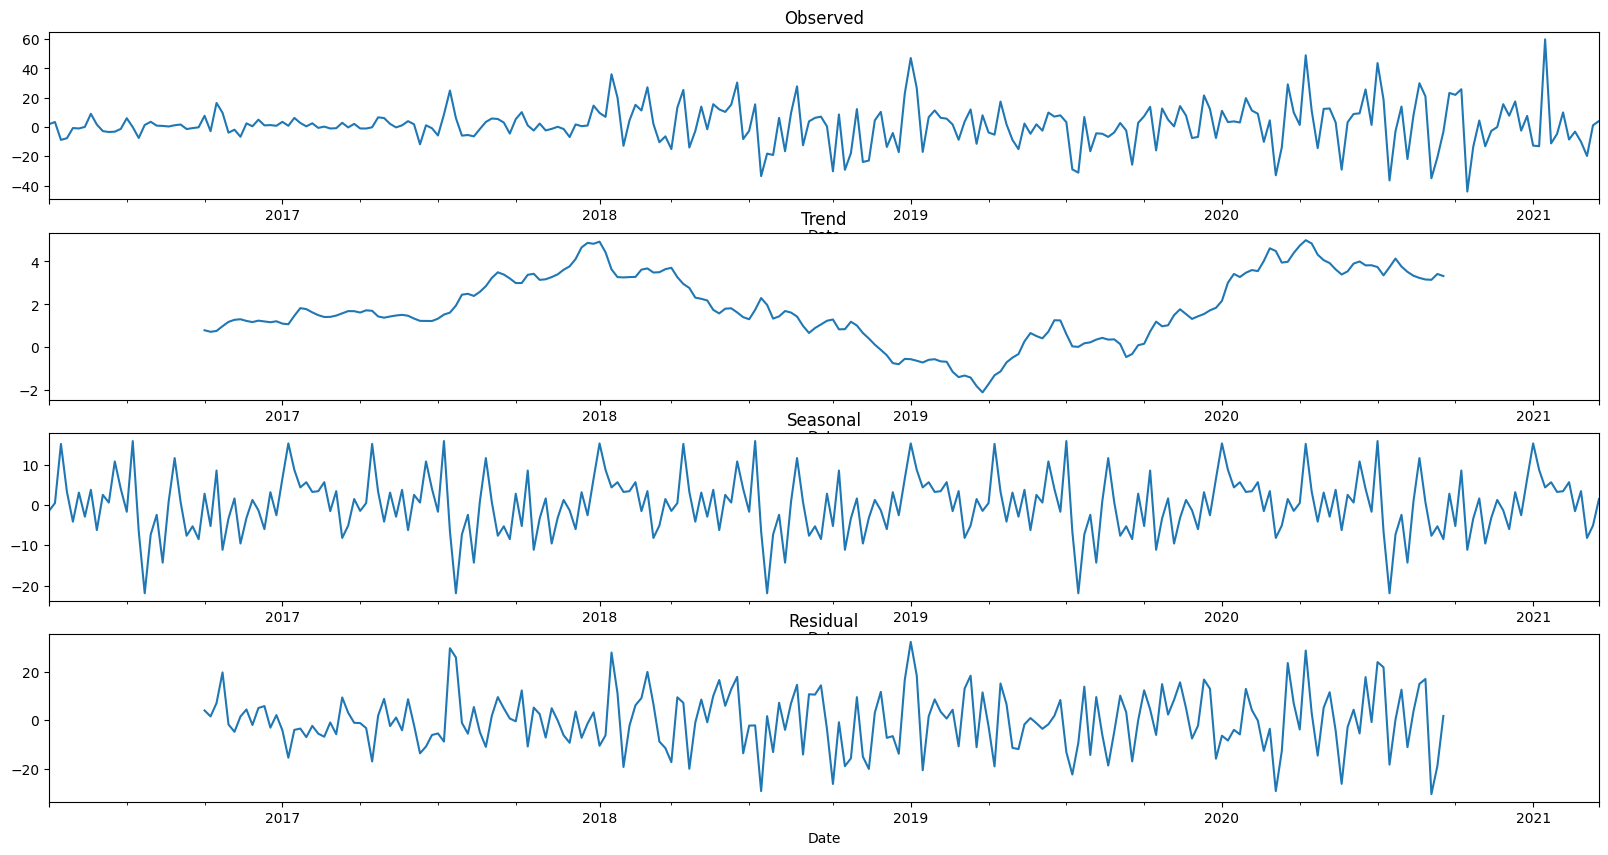

In [85]:
plot_partitions('CloseDiff')

In [86]:
check_stationarity_series('CloseDiff', 1)

adf:  -8.578545186064042
p_value:  7.841772520309593e-14
critical values:  {'1%': -3.4561550092339512, '5%': -2.8728972266578676, '10%': -2.5728222369384763}
единичных корней нет, ряд стационарен


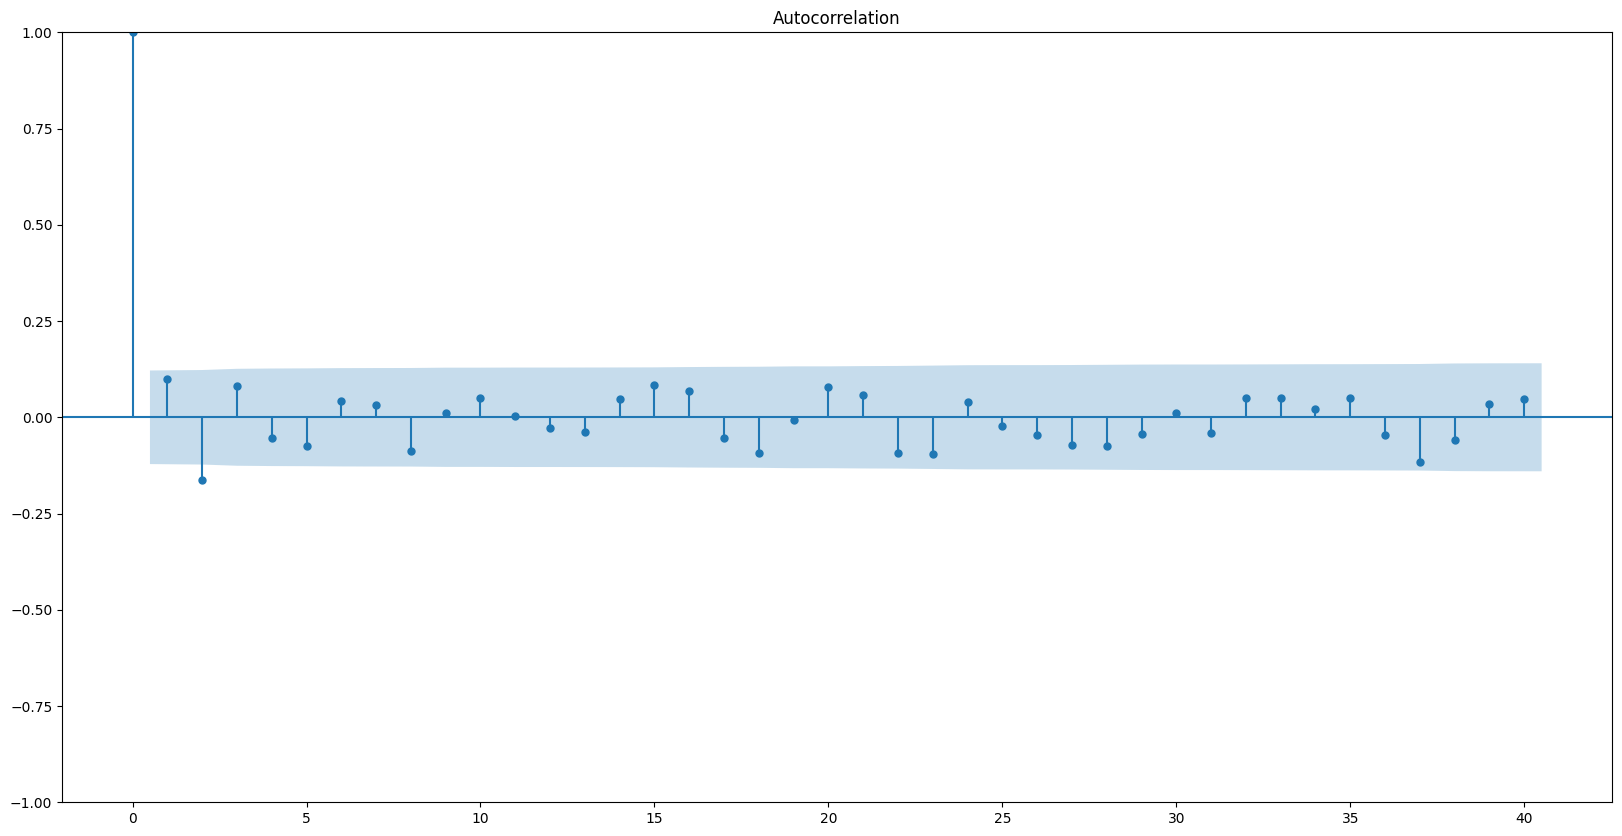

In [87]:
cor('CloseDiff', 1)

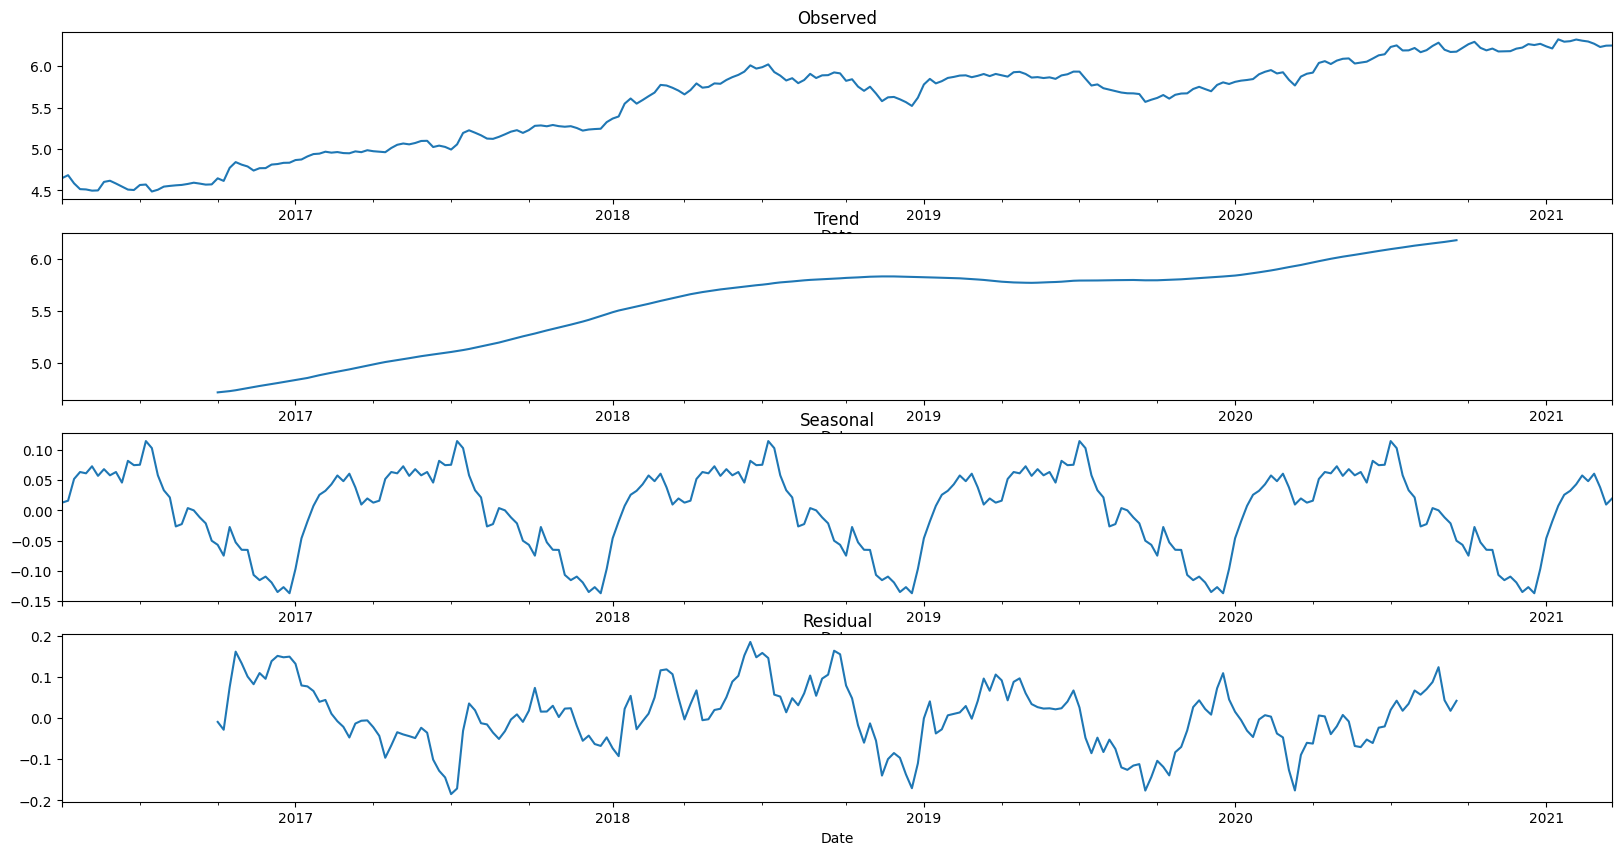

In [88]:
df['CloseLog'] = np.log(df['Close'])
plot_partitions('CloseLog')

In [89]:
check_stationarity_series('CloseLog')

adf:  -1.4470487722629866
p_value:  0.5595242757716651
critical values:  {'1%': -3.4561550092339512, '5%': -2.8728972266578676, '10%': -2.5728222369384763}
есть единичные корни, ряд не стационарен


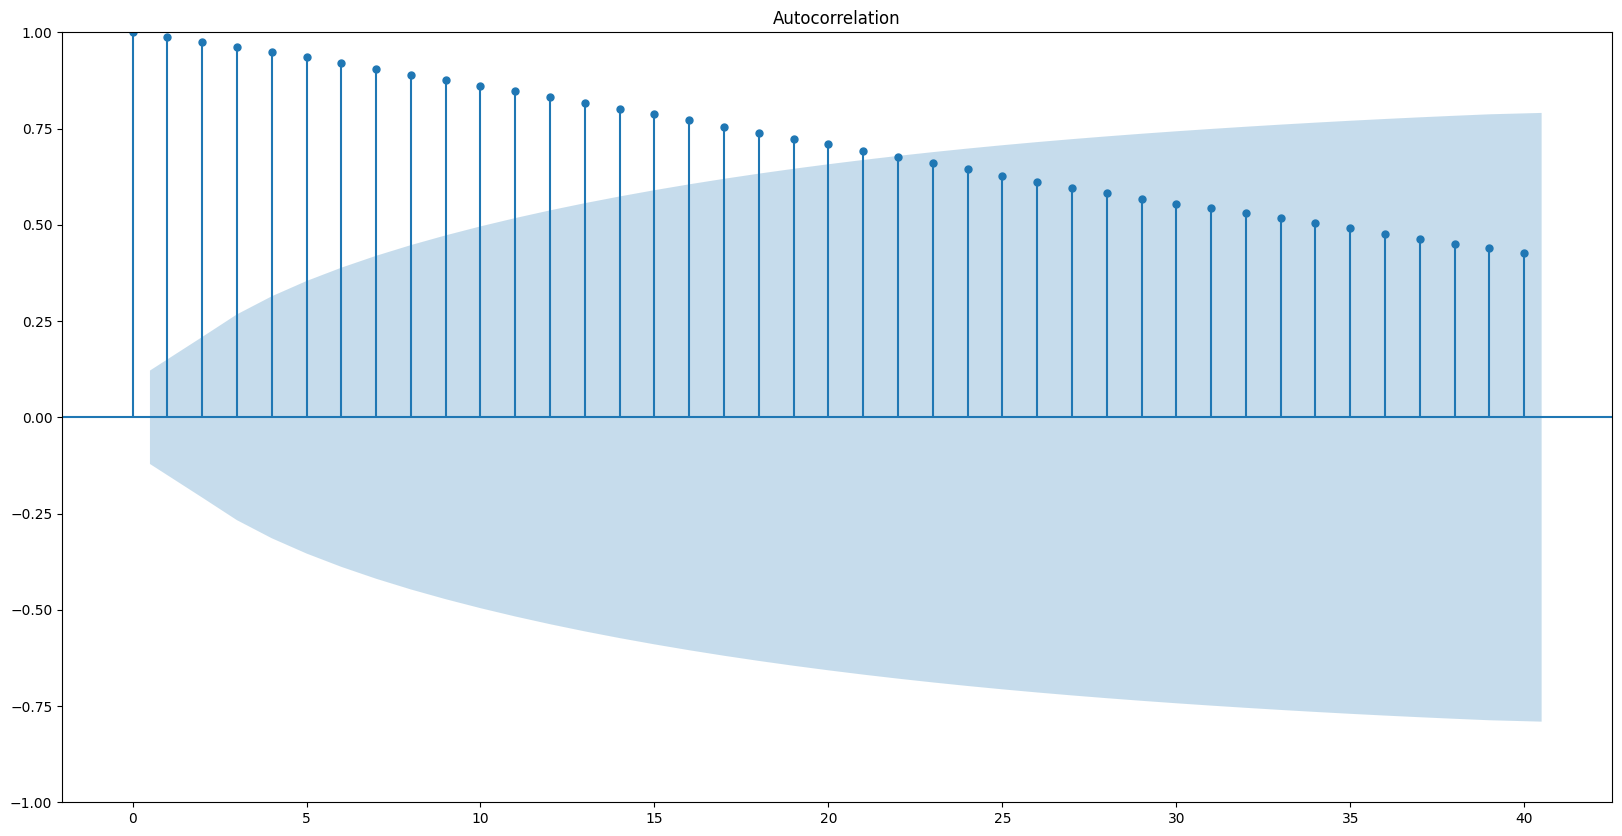

In [90]:
cor('CloseLog')

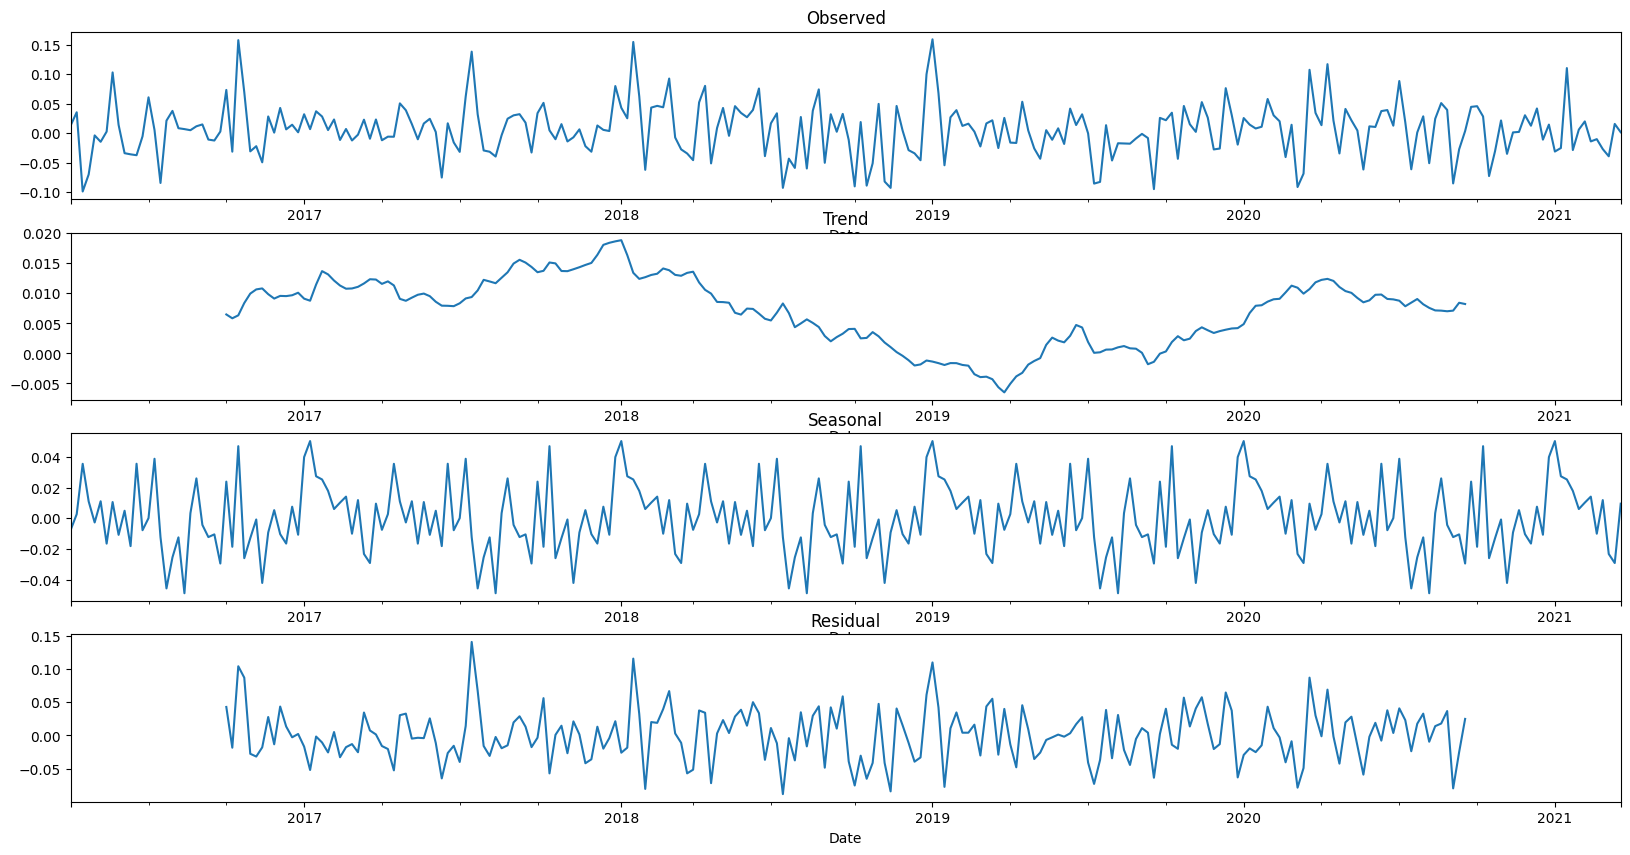

In [91]:
df['CloseLogDiff'] = df['CloseLog'].diff(1)
plot_partitions('CloseLogDiff', 1)

In [92]:
check_stationarity_series('CloseLogDiff', 1)

adf:  -8.810480347809941
p_value:  1.9976084104936258e-14
critical values:  {'1%': -3.4561550092339512, '5%': -2.8728972266578676, '10%': -2.5728222369384763}
единичных корней нет, ряд стационарен


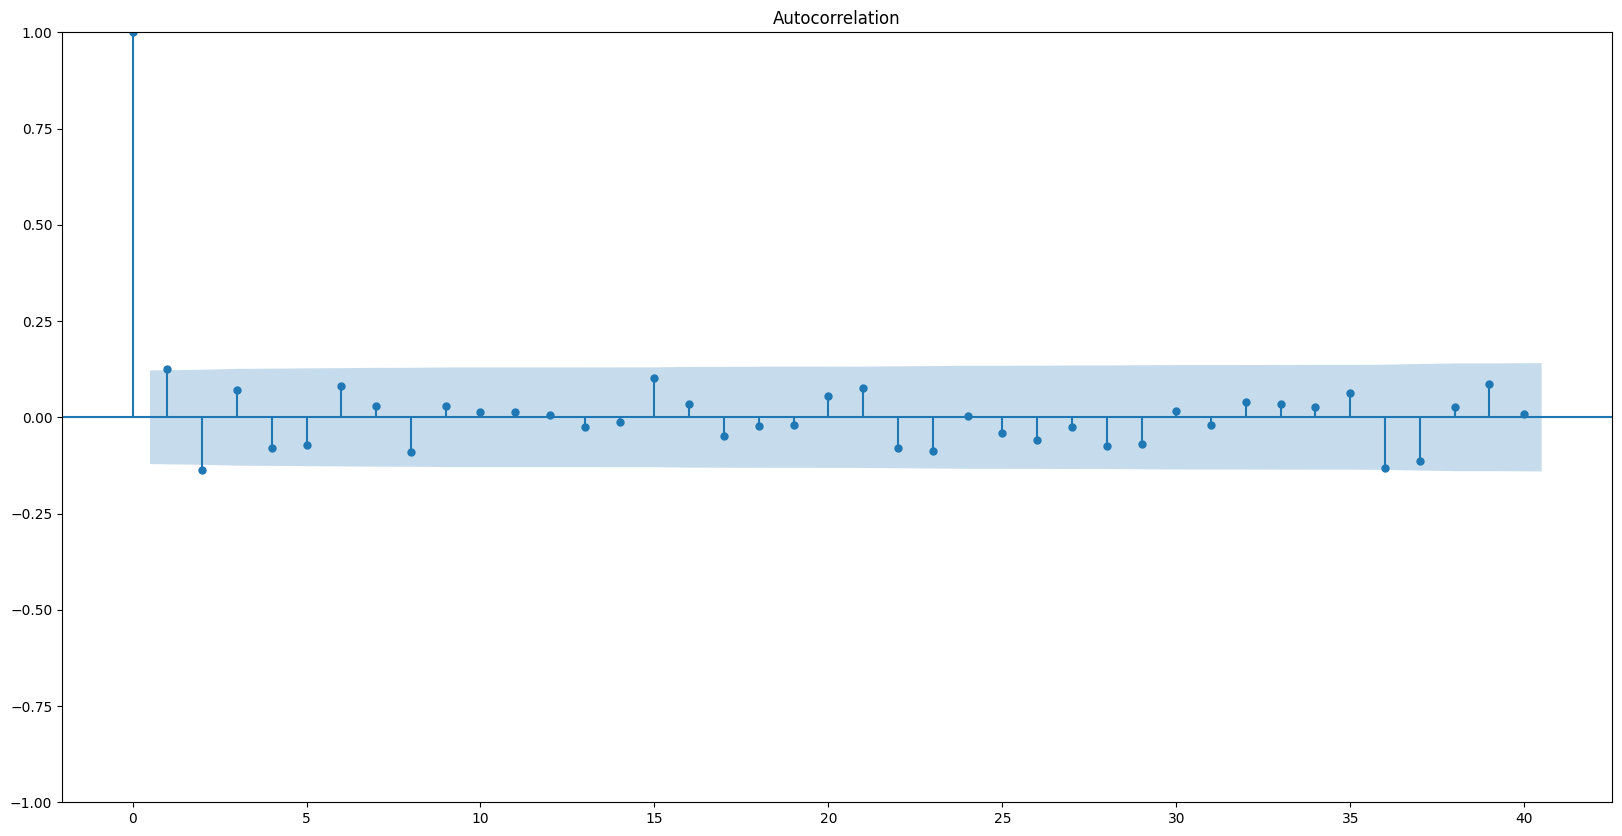

In [93]:
cor('CloseLogDiff', 1)

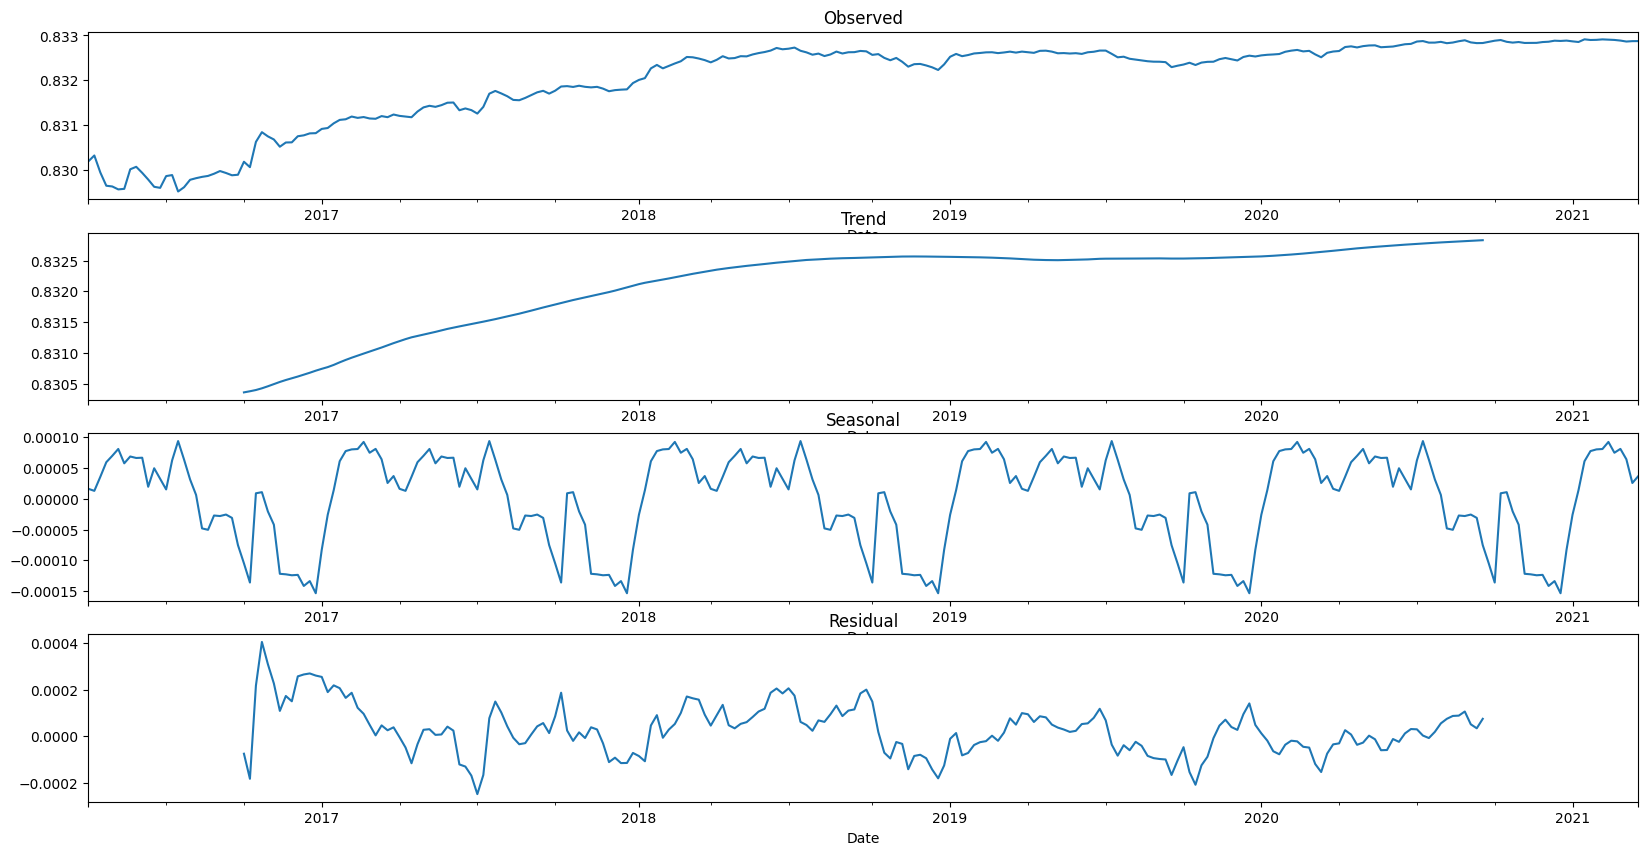

In [94]:
from scipy.special import boxcox

df['CloseBoxCox'] = boxcox(df['Close'], -1.2)
plot_partitions('CloseBoxCox')

In [95]:
check_stationarity_series('CloseBoxCox', 0)

adf:  -3.056983740007872
p_value:  0.02990474252099303
critical values:  {'1%': -3.4562572510874396, '5%': -2.8729420379793598, '10%': -2.5728461399461744}
единичных корней нет, ряд стационарен


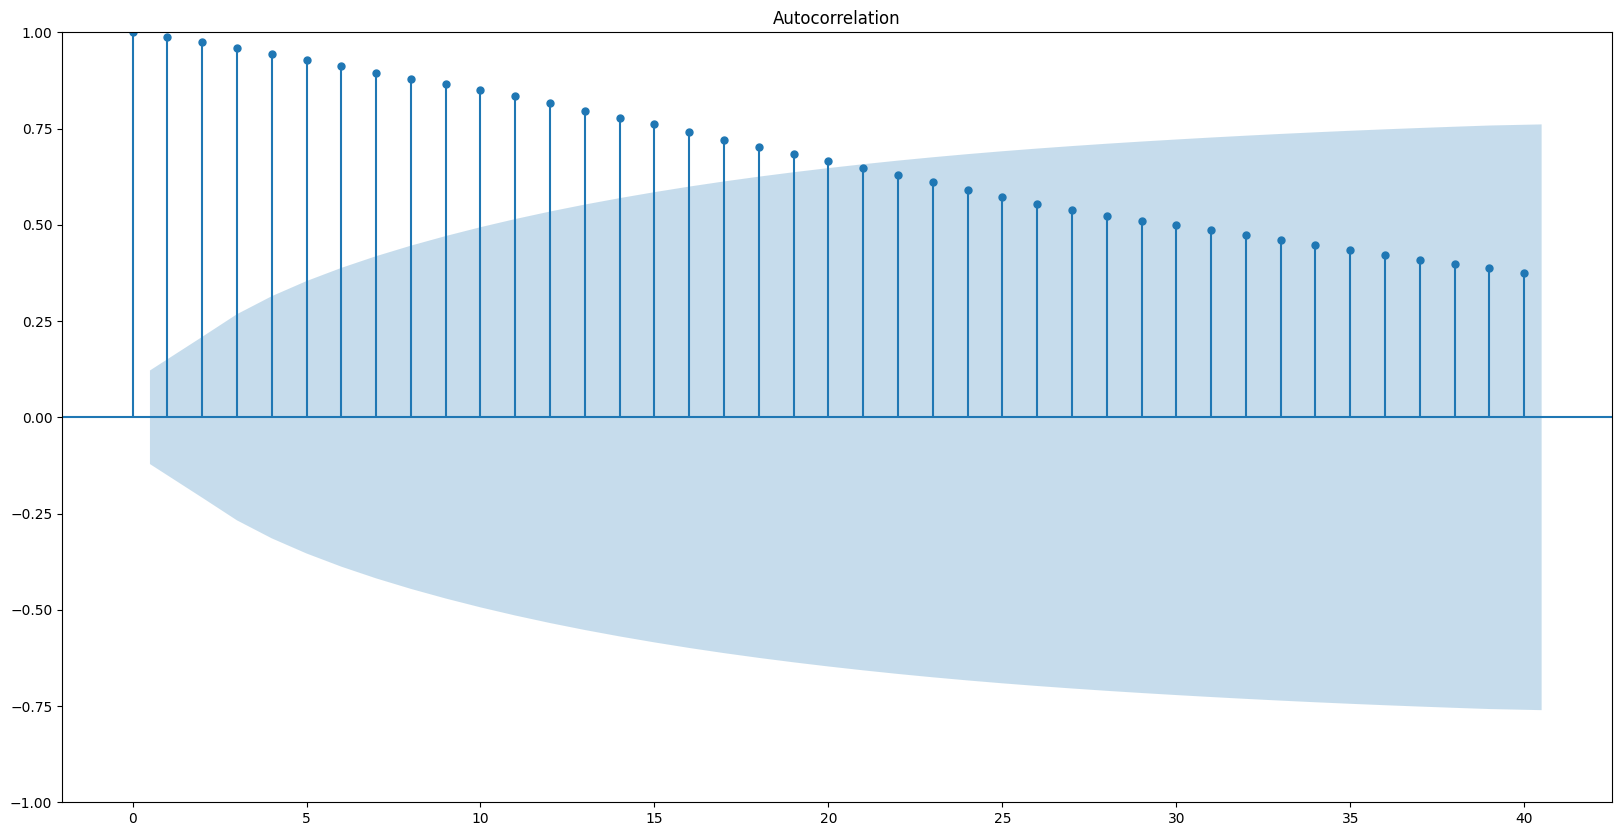

In [96]:
cor('CloseBoxCox', 1)

# Предсказание
Будем предсказывать на CloseLogDiff

## SARIMA


In [97]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

len_df = len(df)
len_train = int(len_df * 0.8)
len_test = len_df - len_train
print(len_df, len_train, len_test)

261 208 53


In [98]:
df['CloseLogDiff'][0] = 0
model = auto_arima(df['CloseLogDiff'][:len_train], start_p=1, start_q=1,
                   test='adf', max_p=2, max_q=1, m=52, start_P=0, max_P=1,
                   max_Q=1, d=0, D=1, seasonal=True, error_action ='ignore',
                   supress_warnings=True, trace=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=41.47 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=-391.359, Time=0.43 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=inf, Time=15.71 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=22.14 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=-393.061, Time=0.50 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=-436.238, Time=5.14 sec
 ARIMA(0,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=17.79 sec
 ARIMA(0,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=7.74 sec
 ARIMA(0,0,1)(1,1,0)[52] intercept   : AIC=-445.009, Time=8.72 sec
 ARIMA(0,0,1)(0,1,0)[52] intercept   : AIC=-393.506, Time=1.12 sec
 ARIMA(0,0,1)(1,1,1)[52] intercept   : AIC=inf, Time=21.45 sec
 ARIMA(1,0,1)(1,1,0)[52] intercept   : AIC=-450.844, Time=27.44 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=-403.375, Time=4.39 sec
 ARIMA(1,0,1)(1,1,1)[52] intercept   : AIC=inf, Time=33.39 sec
 ARIMA(2,0,1)(1,1,0)[52] intercept   : AIC=-449

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  208
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 52)   Log Likelihood                 229.650
Date:                             Tue, 01 Nov 2022   AIC                           -451.300
Time:                                     01:01:49   BIC                           -439.100
Sample:                                 03-27-2016   HQIC                          -446.345
                                      - 03-15-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5178      0.156     -3.313      0.001      -0.824      -0.211
ma.L1          0.8284      0.110      7.507      0.000       0.612       1.045
ar.S.L52      -0.5993      0.052    -11.605      0.000      -0.700      -0.498
sigma2         0.0027      0.000      8.241      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.85   Prob(JB):                         0.61
Heteroskedasticity (H):               1.06   Skew:                             0.14
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
fitted = model.predict(n_periods=len_test)
def redo_diff(start, diffed):
    arr = diffed.copy()
    arr[0] = start
    return arr.cumsum()

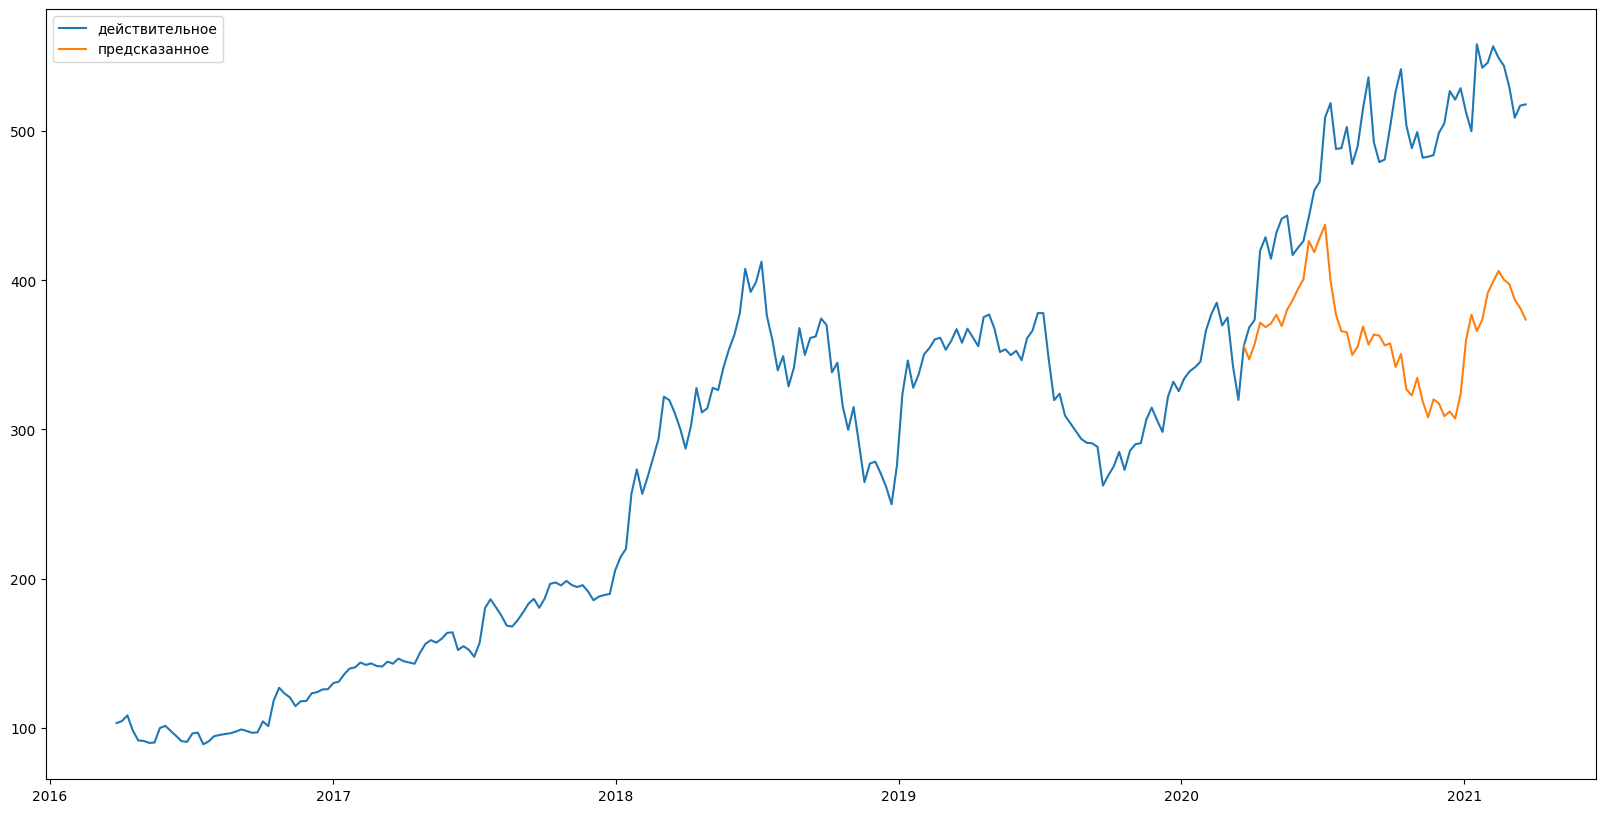

In [108]:
restored = redo_diff(df['CloseLog'][len_train], fitted).apply(lambda x: np.exp(x))
plt.plot(df['CloseLog'].apply(lambda x: np.exp(x)))
plt.plot(restored)
plt.legend(["действительное", "предсказанное"])
plt.show()

In [109]:
mean_absolute_percentage_error(df['Close'][-len_test:], restored)

0.23921422890091465

## Модель Хольта-Уинтерса

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


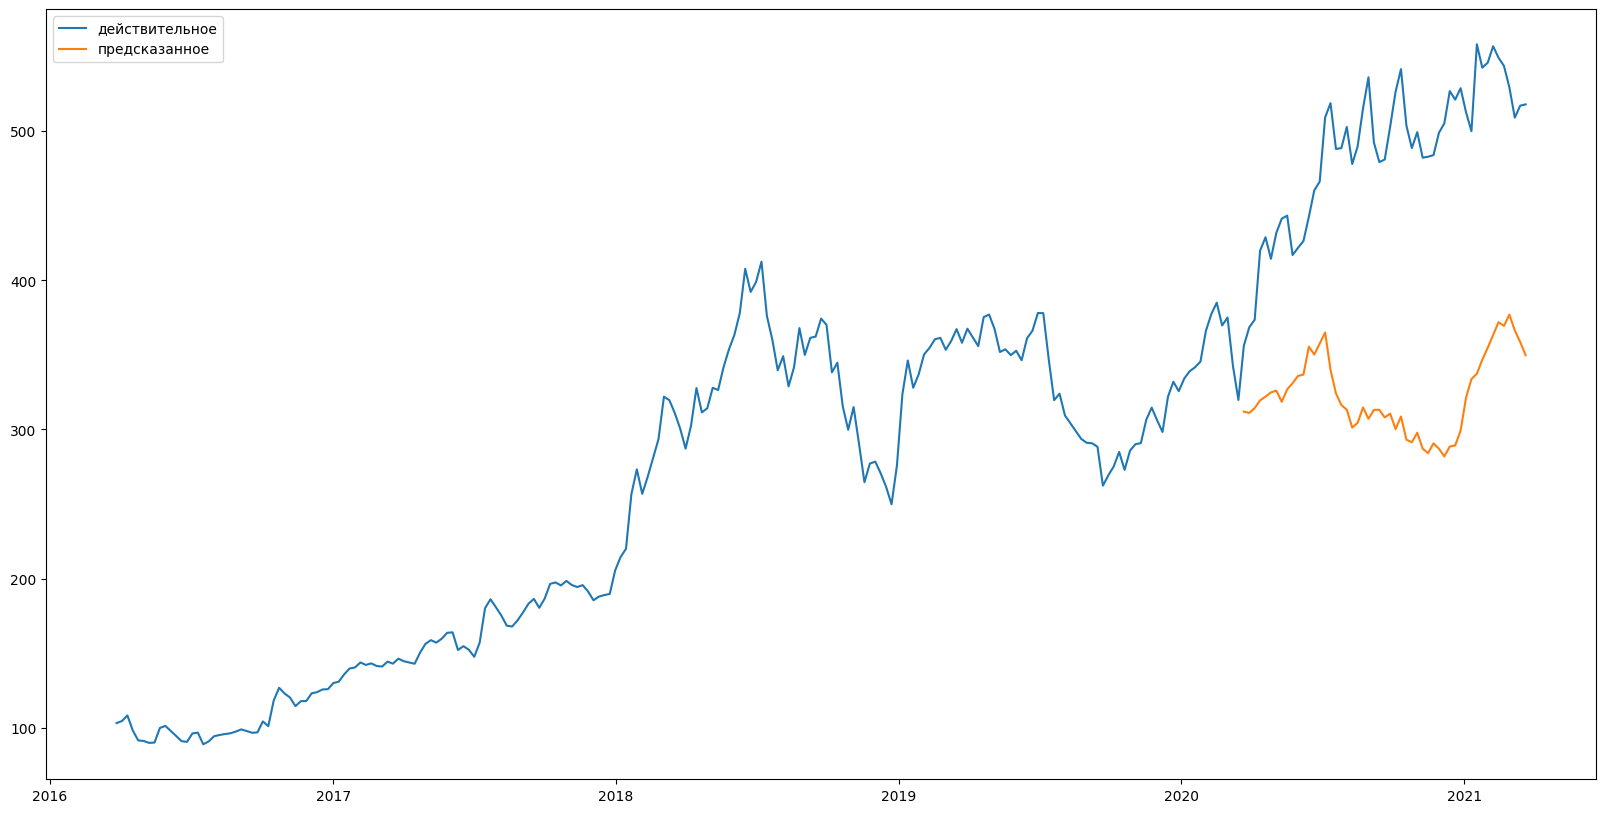

In [102]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['Close'][:len_train], trend="mul", seasonal="mul")
fit = model.fit()
pred = fit.forecast(len_test)
plt.plot(df['Close'])
plt.plot(pred[-len_test:])
plt.legend(["real", "predicted"])
plt.show()

In [103]:
mean_absolute_percentage_error(df['Close'][-len_test:], pred[-len_test:])

0.32886712099546894